In [1]:
library(naturalsort)
library(data.table)
library(data.tree)
library(Biostrings)
library(fields)
dataDir <- '~/jackgl/Data/Simulations/070718/simout070718_3/'

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading required package: stats4

Attaching packag

In [2]:
flst<-list.files(dataDir) # Get list of files from directory
flst <- naturalsort(flst) # Natural sort the files
nclst <- c() # Total number of cells for each simulation
ncls <- c() # Number of cells for each genotype
rs <- c() # Birth rate for each genotype

nGeno <- c() # Number of genotypes for each simulation

for (i in 1:25) { # Loop over files
    load(paste0(dataDir,flst[i])) # Load the current simulation output file
    nGeno[i] <- CellPop$totalCount # Get number of genotypes in population (number of L1 insertions)
    if (CellPop$totalCount==1) { # If the genotype tree has 1 node
        ncls[[i]] <- CellPop$ncells[length(CellPop$ncells)]
    }
    else {
        ncls[[i]] <- vapply(CellPop$Get('ncells'),tail,n=1L,FUN.VALUE = numeric(1))
    }
    nclst[[i]] <- N # Get total number of cells
    rs[[i]] <- CellPop$Get('B') # Get the division rates of all nodes
    rm('CellPop','N')
    
}

In [3]:
# Function for computing mode value
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [4]:
rs_var <- c()
rs_mean <- c()
rs_max <- c()
# cellPs_var <- c()
# cellPs_mean <- c()
ncls_var <- c()

for (i in 1:length(rs)) {
    
    if (length(rs[[i]])==1) {rs_var[i] <- 0}
#     if (length(cellPs[[i]])==1) {cellPs_var[i] <- 0}
    
    else {
        rs_var[i] <- var(rs[[i]])
        rs_mean[i] <- mean(rs[[i]])
        rs_max[i] <- max(rs[[i]])
#         cellPs_var[i] <- var(cellPs[[i]])
#         cellPs_mean[i] <- mean(cellPs[[i]])
    }
    ncls_var[i] <- var(ncls[[i]])

}

In [5]:
norml <- function(x) {
    x = (x-min(x))/(max(x)-min(x))
    return(x)}

In [6]:
nclsot <- nclst
nclst <- lapply(nclst,tail,n=1)

In [7]:
matrix(nclst[1:25],nrow=5,ncol=5,byrow=TRUE)

65536,65282,65021,64511,62425
65538,65286,63488,64765,64157
67718,64157,68976,62881,63979
66474,65022,63804,64619,61603
66420,67127,65850,60621,63226


In [8]:
matrix(rs_mean[1:25],nrow=5,ncol=5,byrow=TRUE)

1.000000,0.9928691,0.9893784,0.9839060,0.9883946
1.000439,0.9928638,0.9879362,0.9840173,0.9896355
1.016012,0.9879448,1.0210787,0.9816563,0.9917414
1.010721,0.9923875,0.9867360,0.9869838,0.9909631
1.014614,1.0175690,1.0015090,0.9802163,0.9943906


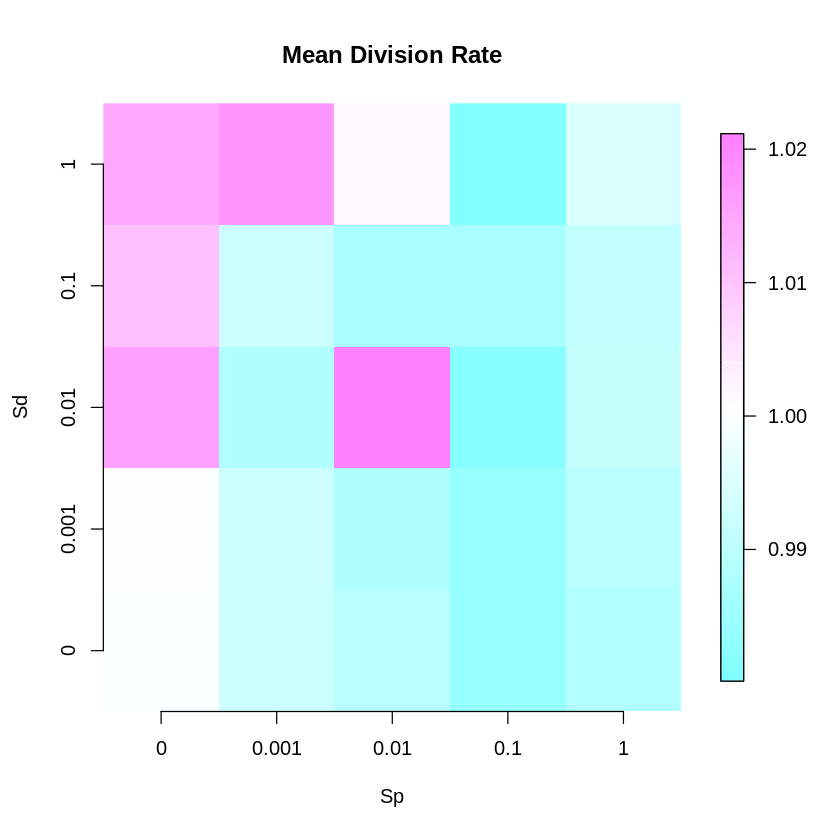

In [9]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(rs_mean[1:25],nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F,col=cm.colors(256))

title(main="Mean Division Rate",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 
axis(2, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 

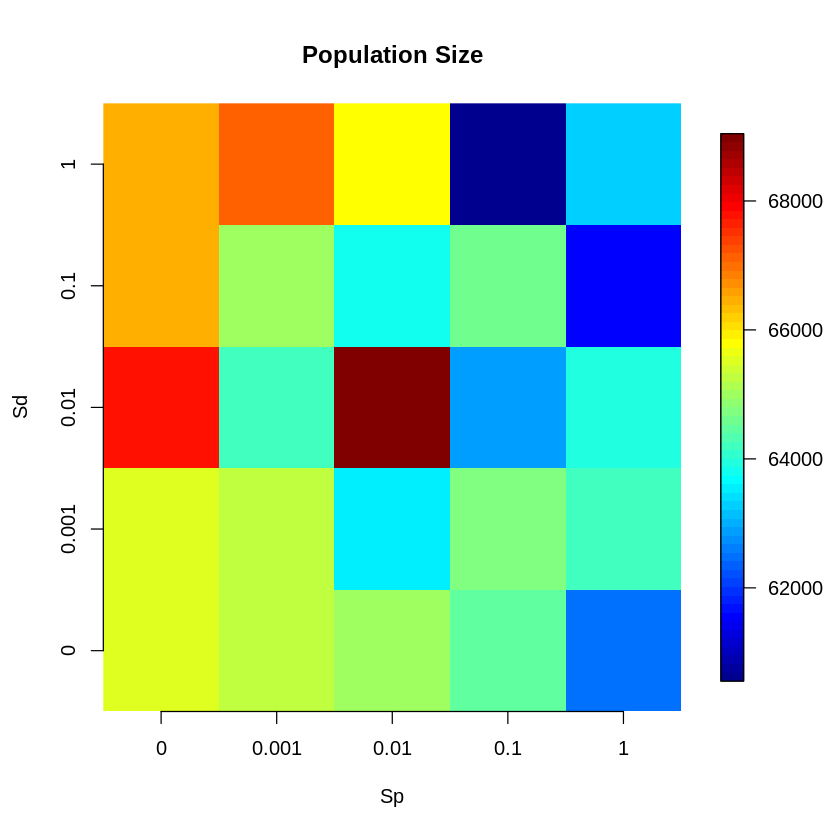

In [10]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(unlist(nclst[1:25]),nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Population Size",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 
axis(2, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 

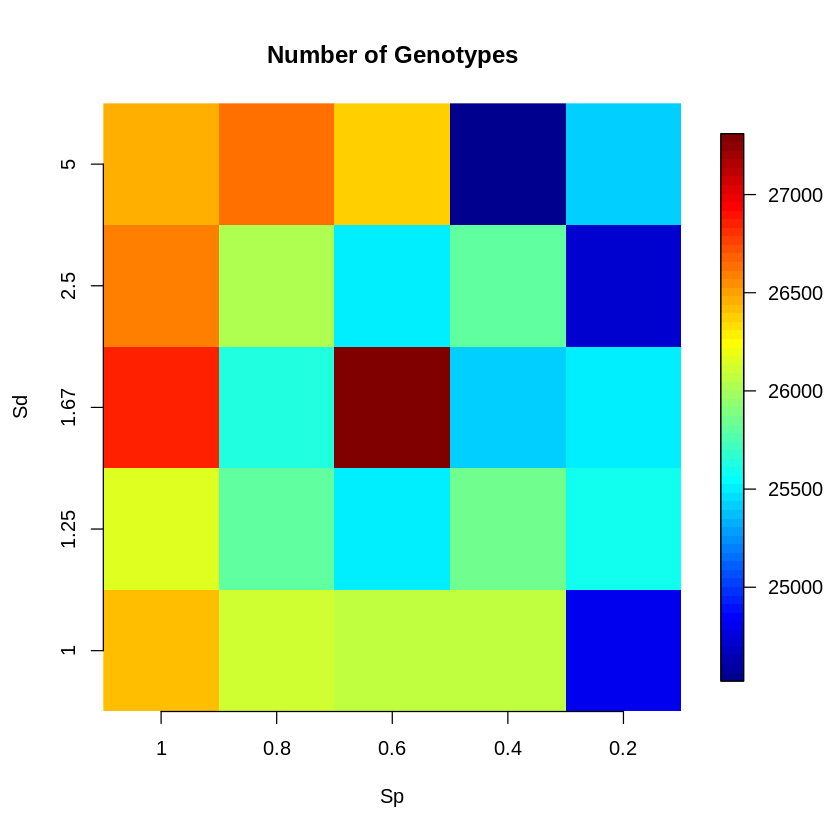

In [11]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(nGeno[1:25],nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Number of Genotypes",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(1.0,0.2,-0.2)); 
axis(2, at=seq(0,1,0.25), labels=c(1.00,1.25,1.67,2.50,5.00)); 

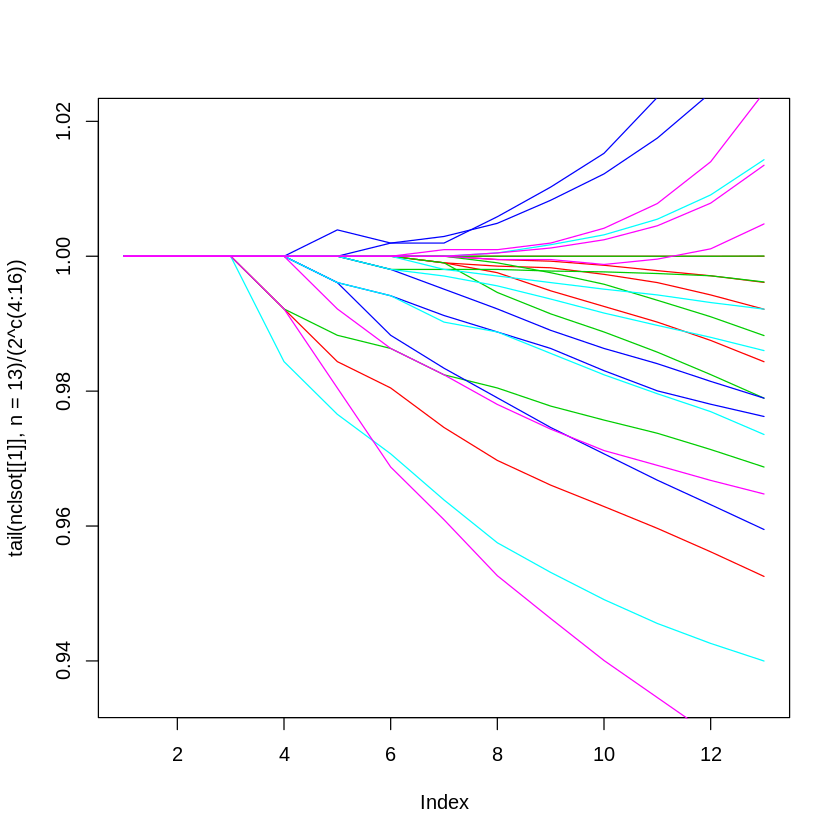

In [12]:
colscheme = c("green2","turquoise3","steelblue3","grey","black")
plot(tail(nclsot[[1]],n=13)/(2^c(4:16)),type='n',ylim=c(0.935,1.02))
# plot(tail(nclsot[[1]],n=13))
# cols = c(rep(c(2:6),5))
cols = c(2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6)
for (i in 1:25) {
    lines(tail(nclsot[[i]],n=13)/(2^c(4:16)),col=cols[i])
#     lines(tail(nclsot[[i]],n=13))
}

In [13]:
save(nclsot,nclst,ncls,rs,file='~/Desktop/out070718/3.rda')